In [1]:
# Importing libraries for cnn
import cv2
import PIL
import os

# Importing libararies for neural network

import tensorflow as tf
from tensorflow import keras

# Importing libararies for data manipulation

import pandas as pd
import numpy as np

# Importing libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)    #. for current dir, untar for unzipping

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/daisy/9350942387_5b1d043c26_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/21626652132_97e1318bb8_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5981645737_29eceac291_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/11642632_1e7627a2cc.jpg'),
 PosixPath('datasets/flower_photos/daisy/15306268004_4680ba95e1.jpg'),
 PosixPath('datasets/flower_photos/daisy/20289938802_e16fa9f23d.jpg'),
 PosixPath('datasets/flower_photos/daisy/4407065098_ef25f1ccac_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/7189043225_2fe781439a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14698531521_0c2f0c6539.jpg'),
 PosixPath('datasets/flower_photos/daisy/14088053307_1a13a0bf91_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/15207766_fc2f1d692c_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14471433500_cdaa22e3ea_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/14921511479_7b0a647795.jpg'),
 PosixPath('datasets/flower_photos/daisy/2539552964_921cf645ba_n.jpg'),

In [6]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [7]:
roses = list(data_dir.glob('roses/*.jpg'))
roses

[PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6158504080_b844a9ae05.jpg'),
 PosixPath('datasets/flower_photos/roses/7502389724_85b4a6c855_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6655078437_759fd626fd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg'),
 PosixPath('datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5578766623_542c91dfaa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8622493424_877ae35ed7.jpg'),
 PosixPath('datasets/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16643944275_3cd4cd966c.jpg'),
 PosixPath('datasets/flower_photos/roses/14414123198_24606fb32d.jpg'),
 PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/roses/9167147034_0a66ee3616_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5060536705_b370a5c543_n.jpg'),
 P

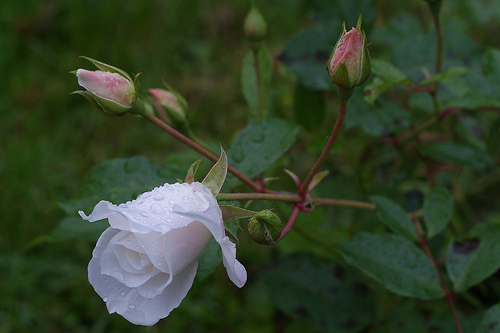

In [8]:
PIL.Image.open(str(roses[1]))

In [9]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips

[PosixPath('datasets/flower_photos/tulips/116343334_9cb4acdc57_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14017640283_c417141832_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5719416820_3060e3c1f0.jpg'),
 PosixPath('datasets/flower_photos/tulips/3502974120_9f1eceaf8b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2418823693_72eec80f42_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14066056226_d8564a083e_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/17994129033_bbd0acba62_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8750288831_5e49a9f29b.jpg'),
 PosixPath('datasets/flower_photos/tulips/4838669164_ffb6f67139.jpg'),
 PosixPath('datasets/flower_photos/tulips/13888320717_d2919a879b_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/478765271_6a8ca1cfa1_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/5666286130_1dc6f66f09_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4604272150_0c92385530_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4442928974_96

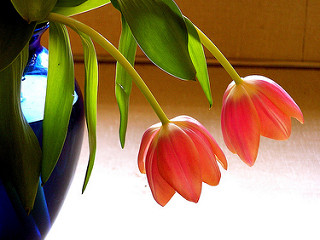

In [10]:
PIL.Image.open(str(tulips[0]))

In [11]:
flower_images_dict = {
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'daisy' : list(data_dir.glob('daisy/*.jpg')),
    'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers' : list(data_dir.glob('sunflowers/*.jpg')),
    'tulips' : list(data_dir.glob('tulips/*.jpg')),
}
flower_images_dict

{'roses': [PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg'),
  PosixPath('datasets/flower_photos/roses/6158504080_b844a9ae05.jpg'),
  PosixPath('datasets/flower_photos/roses/7502389724_85b4a6c855_n.jpg'),
  PosixPath('datasets/flower_photos/roses/6655078437_759fd626fd_n.jpg'),
  PosixPath('datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg'),
  PosixPath('datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg'),
  PosixPath('datasets/flower_photos/roses/5578766623_542c91dfaa_n.jpg'),
  PosixPath('datasets/flower_photos/roses/8622493424_877ae35ed7.jpg'),
  PosixPath('datasets/flower_photos/roses/6105809987_8f3d7a8d67_n.jpg'),
  PosixPath('datasets/flower_photos/roses/16643944275_3cd4cd966c.jpg'),
  PosixPath('datasets/flower_photos/roses/14414123198_24606fb32d.jpg'),
  PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
  PosixPath('datasets/flower_photos/roses/9167147034_0a66ee3616_n.jpg'),
  PosixPath('datasets/flower_photos/roses/5060536705

In [12]:
flower_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}
flower_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [13]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(236, 320, 3)

In [14]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [15]:
x, y = [], []

for flower_name, images in flower_images_dict.items():
    print(flower_name, len(images))

roses 641
daisy 633
dandelion 898
sunflowers 699
tulips 799


In [16]:
x, y = [], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        x.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [17]:
x = np.array(x)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [19]:
len(x_train)

2752

In [20]:
len(x_test)

918

In [21]:
x_test_scaled = x_test/255

In [22]:
x_train_scaled = x_train / 255

In [23]:
x_train_scaled[0]

array([[[0.01176471, 0.10196078, 0.03137255],
        [0.02745098, 0.14117647, 0.03921569],
        [0.02745098, 0.15686275, 0.04313725],
        ...,
        [0.00392157, 0.03529412, 0.00784314],
        [0.00784314, 0.03529412, 0.01568627],
        [0.01176471, 0.03921569, 0.01176471]],

       [[0.        , 0.0745098 , 0.00784314],
        [0.00784314, 0.10196078, 0.01568627],
        [0.01176471, 0.12941176, 0.02745098],
        ...,
        [0.00392157, 0.03529412, 0.00392157],
        [0.00784314, 0.03921569, 0.01176471],
        [0.01176471, 0.03921569, 0.01176471]],

       [[0.00392157, 0.06666667, 0.00784314],
        [0.        , 0.0745098 , 0.00392157],
        [0.        , 0.09803922, 0.01176471],
        ...,
        [0.00392157, 0.03921569, 0.        ],
        [0.00784314, 0.03921569, 0.00784314],
        [0.00784314, 0.03921569, 0.00784314]],

       ...,

       [[0.01960784, 0.16862745, 0.05882353],
        [0.01568627, 0.1254902 , 0.02745098],
        [0.02352941, 0

In [26]:
model = keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5)                     # default it will take linear activation
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3491 - loss: 1.4890
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6052 - loss: 0.9858
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6754 - loss: 0.8481
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7642 - loss: 0.6123
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8587 - loss: 0.4217
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9162 - loss: 0.2530
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9634 - loss: 0.1297
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9869 - loss: 0.0675
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9905 - loss: 0.0385
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9980 - loss: 0.0256
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9999 - loss: 0.0090
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy:

In [27]:
model.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6485 - loss: 2.4907


[2.270148515701294, 0.6601307392120361]

In [35]:
y_predict = model.predict(x_test_scaled)
y_predict[0]

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([ 9.407186  , 31.64085   ,  0.08884365, -7.3847985 ,  4.7413626 ],
      dtype=float32)

In [36]:
y_predicted = []
for x in y_predict:
  y_predicted.append(tf.nn.softmax(x))
y_predicted[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.2082171e-10, 1.0000000e+00, 1.9821567e-14, 1.1255778e-17,
       2.0782672e-12], dtype=float32)>

In [37]:
y_predicted = [np.argmax(x) for x in y_predicted]
y_predicted[0]

1

In [38]:
y_test[0]

1

In [39]:
y_predicted[:5]

[1, 4, 2, 1, 1]

In [40]:
y_test[:5]

array([1, 0, 2, 4, 2])

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54       176
           1       0.60      0.69      0.64       154
           2       0.74      0.74      0.74       226
           3       0.73      0.79      0.76       150
           4       0.65      0.57      0.61       212

    accuracy                           0.66       918
   macro avg       0.66      0.66      0.66       918
weighted avg       0.66      0.66      0.66       918



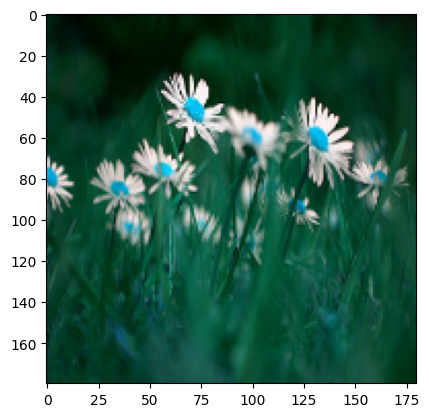

In [47]:
plt.imshow(x_test_scaled[0])

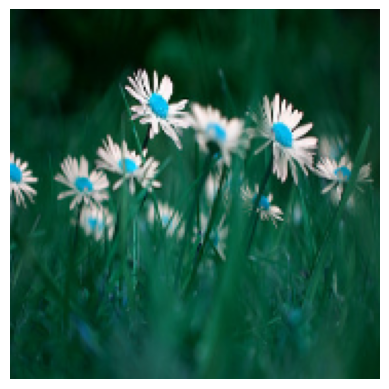

In [48]:
plt.axis('off')
plt.imshow(x_test_scaled[0])

In [54]:
aug_model = keras.Sequential([
    keras.layers.RandomZoom(0.5)
    ])

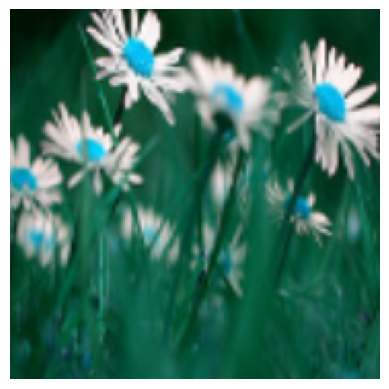

In [55]:
plt.axis('off')
plt.imshow(aug_model(x_test_scaled)[0])

In [56]:
new_aug_model = keras.Sequential([
    keras.layers.RandomContrast(0.9)
])

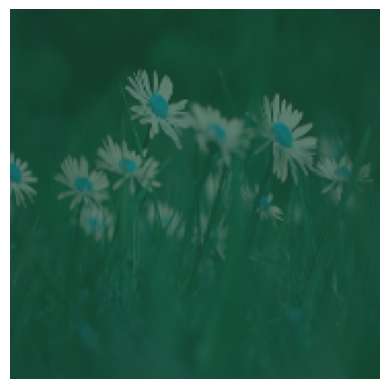

In [57]:
plt.axis('off')
plt.imshow(new_aug_model(x_test_scaled)[0])

In [58]:
rotate_aug_model = keras.Sequential([
    keras.layers.RandomRotation(0.3)
])

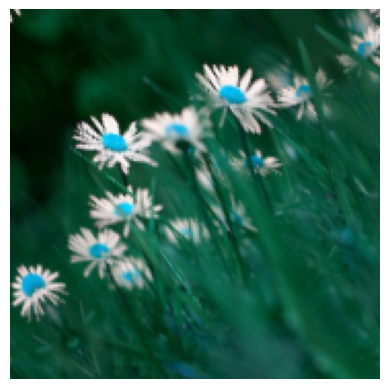

In [59]:
plt.axis('off')
plt.imshow(rotate_aug_model(x_test_scaled)[0])

In [63]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)
])

In [64]:
new_model = keras.Sequential([
    data_augmentation,
    #cnn
    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    #dropout
    keras.layers.Dropout(0.2),

    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5)                     # default it will take linear activation
])

new_model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

new_model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.3537 - loss: 1.4408
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5715 - loss: 1.0798
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6083 - loss: 1.0011
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6485 - loss: 0.9258
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6659 - loss: 0.8322
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7092 - loss: 0.7623
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6913 - loss: 0.7818
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.7155 - loss: 0.7311
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7385 - loss: 0.6886
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7391 - loss: 0.6664
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7577 - loss: 0.6463
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy:

In [65]:
new_model.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7562 - loss: 0.9002


[0.9213588833808899, 0.7538126111030579]